# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [2]:
df = pd.read_csv('../data/checker_submits.csv')
df.head()

,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.day_of_week
df = df.drop('timestamp', axis=1)
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [4]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorial_colm = ['uid', 'labname', 'hour', 'numTrials']
encoder_data = encoder.fit_transform(df[['uid', 'labname']])
encoder_df = pd.DataFrame(encoder_data, columns=encoder.get_feature_names_out(['uid', 'labname']))
df = pd.concat([df, encoder_df], axis=1)
df = df.drop(['uid', 'labname'], axis=1)
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,6,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,7,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,8,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
scaler = StandardScaler()
scaler_data = scaler.fit_transform(df[['numTrials', 'hour']])
df[['numTrials', 'hour']] = scaler_data
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
df.to_csv('../data/dayofweek.csv', index=False)

In [7]:
mode = df['dayofweek'].mode()[0]
nativ_data = [mode] * len(df)
accuracy = accuracy_score(df['dayofweek'], nativ_data)
print(f"Точность наивного алгоритма: {accuracy}")

Точность наивного алгоритма: 0.23487544483985764


## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [8]:
X = df.drop(['dayofweek'], axis=1)
y = df['dayofweek']

In [9]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(X, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [10]:
model_pred = model.predict(X)
accuracy_score(y, model_pred)

0.6405693950177936

In [11]:
def draw_plot(coefficients, feature_names, top_n=10):
    if len(coefficients.shape) > 1:
        mean_coef = np.mean(np.abs(coefficients), axis=0)
        top_indices = np.argsort(mean_coef)[-top_n:]
        top_coef = mean_coef[top_indices]
        top_future_name = [feature_names[i] for i in top_indices]
    else:
        top_indices = np.argsort(np.abs(coefficients))[-top_n:]
        top_coef = coefficients[top_indices]
        top_future_name = [feature_names[i] for i in top_indices]

    plt.figure(figsize=(15, 8))
    plt.barh(range(top_n), top_coef, align='center')
    plt.yticks(range(top_n), top_future_name)
    plt.xlabel("Importance (Absolute Value)")
    plt.title(f"Top {top_n} Most Important Features")
    plt.show()

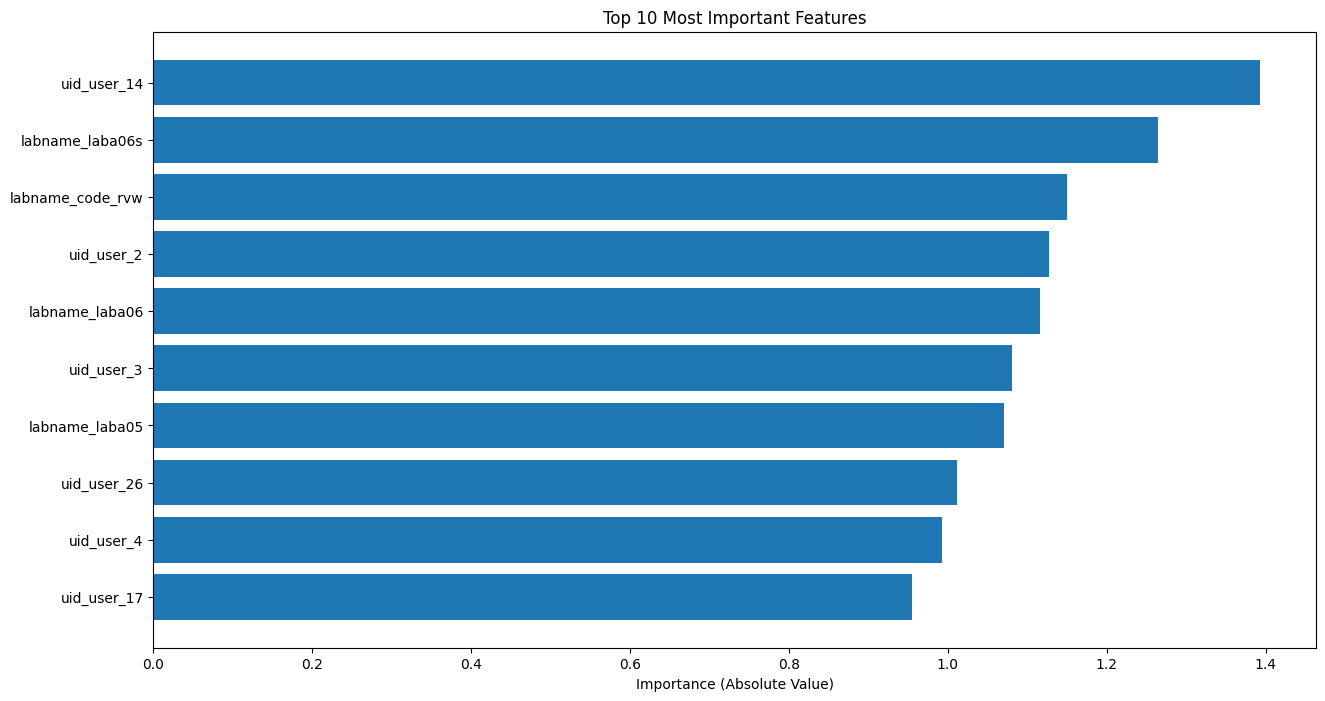

In [12]:
draw_plot(model.coef_, X.columns)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [13]:
model_svc = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21))
model_svc.fit(X, y)

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  random_state=21))

In [14]:
model_pred = model_svc.predict(X)
accuracy_score(y, model_pred)

0.6126927639383155

In [15]:
result = []
kernels = ['poly', 'sigmoid', 'rbf']
for kernel in kernels:
    model_ker = OneVsRestClassifier(SVC(kernel=kernel, probability=True, random_state=21))
    model_ker.fit(X, y)
    model_pred = model_ker.predict(X)
    accuracy = accuracy_score(y, model_pred)
    result.append({'kernel': kernel, 'accuracy': accuracy})
result_df = pd.DataFrame(result)
result_df

,kernel,accuracy
0,poly,0.865362
1,sigmoid,0.349941
2,rbf,0.864176


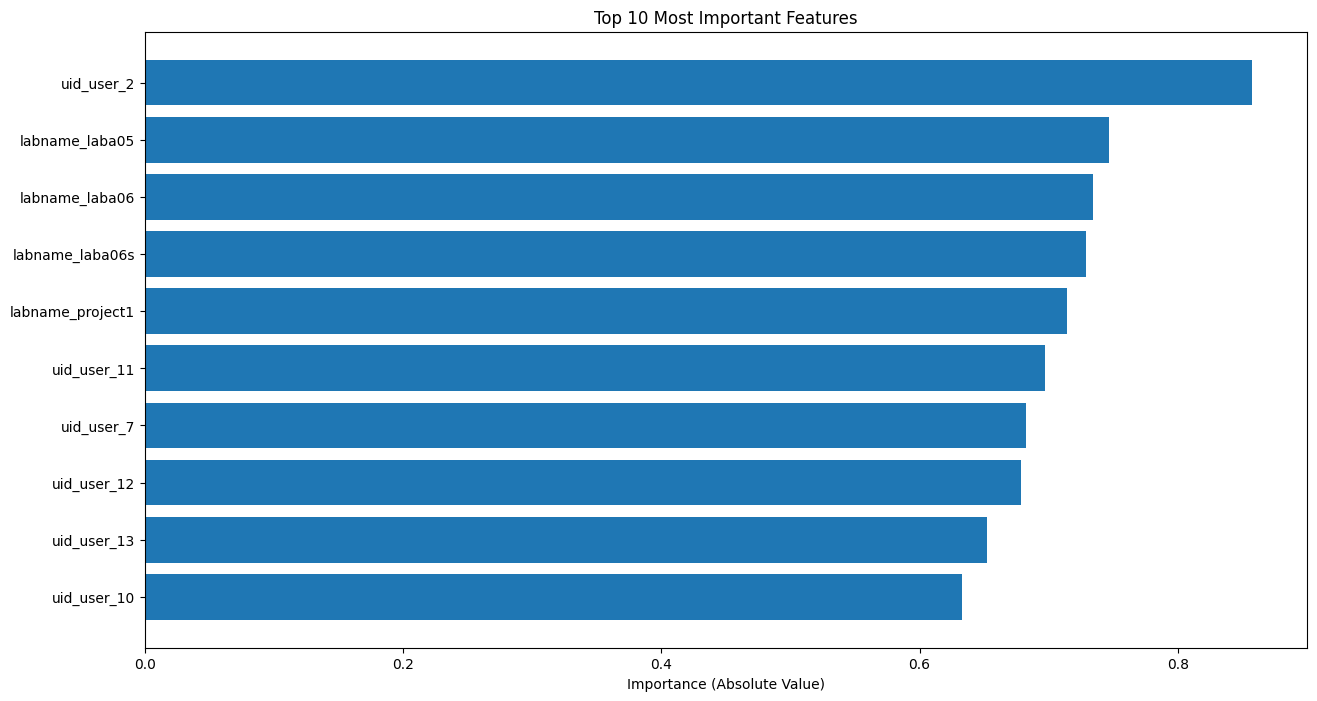

In [16]:
coef = np.vstack([estimator.coef_ for estimator in model_svc.estimators_])
draw_plot(coef, X.columns)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [17]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X, y)
result = []
for max_depth in range(2, 7):
    tree_dep = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree_dep.fit(X, y)
    pred = tree_dep.predict(X)
    accuracy = accuracy_score(pred, y)
    result.append({'max_depth': max_depth, 'accuracy_score': accuracy})
result_df = pd.DataFrame(result)
result_df

,max_depth,accuracy_score
0,2,0.438909
1,3,0.489917
2,4,0.551601
3,5,0.610913
4,6,0.663701


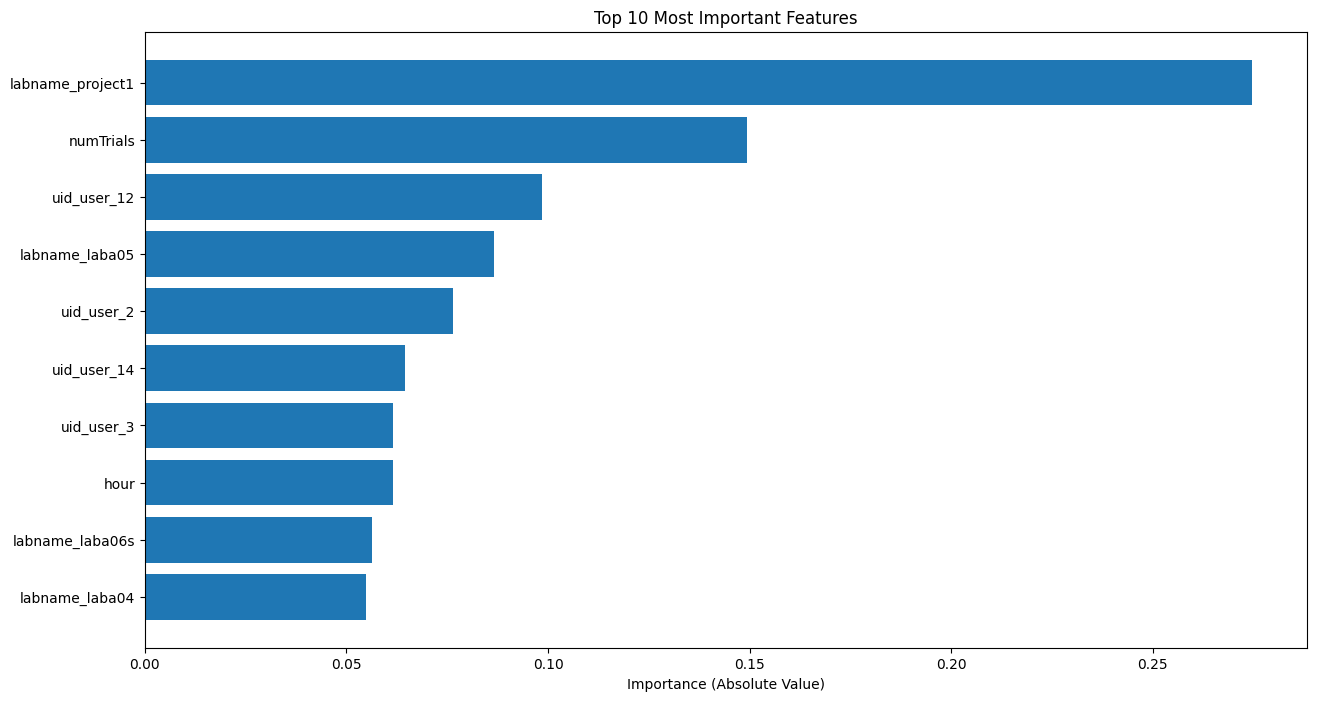

In [18]:
draw_plot(tree.feature_importances_, X.columns)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [19]:
model_forest = RandomForestClassifier(n_estimators=100, max_depth = 25, random_state=21)
model_forest.fit(X, y)

RandomForestClassifier(max_depth=25, random_state=21)

In [20]:
result = []
estimators = [100, 300, 500, 1000]
depth = [5, 10, 15, 25]
for max_depth in depth:
    for n_estimators in estimators:
        tree_dep = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=21)
        tree_dep.fit(X, y)
        pred = tree_dep.predict(X)
        accuracy = accuracy_score(pred, y)
        result.append({'max_depth': max_depth, 'estimators': n_estimators, 'accuracy_score': accuracy})
result_df = pd.DataFrame(result)
result_df

,max_depth,estimators,accuracy_score
0,5,100,0.579478
1,5,300,0.596679
2,5,500,0.593713
3,5,1000,0.602610
4,10,100,0.885528
5,10,300,0.874259
6,10,500,0.871293
7,10,1000,0.872479
8,15,100,0.978055
9,15,300,0.979834


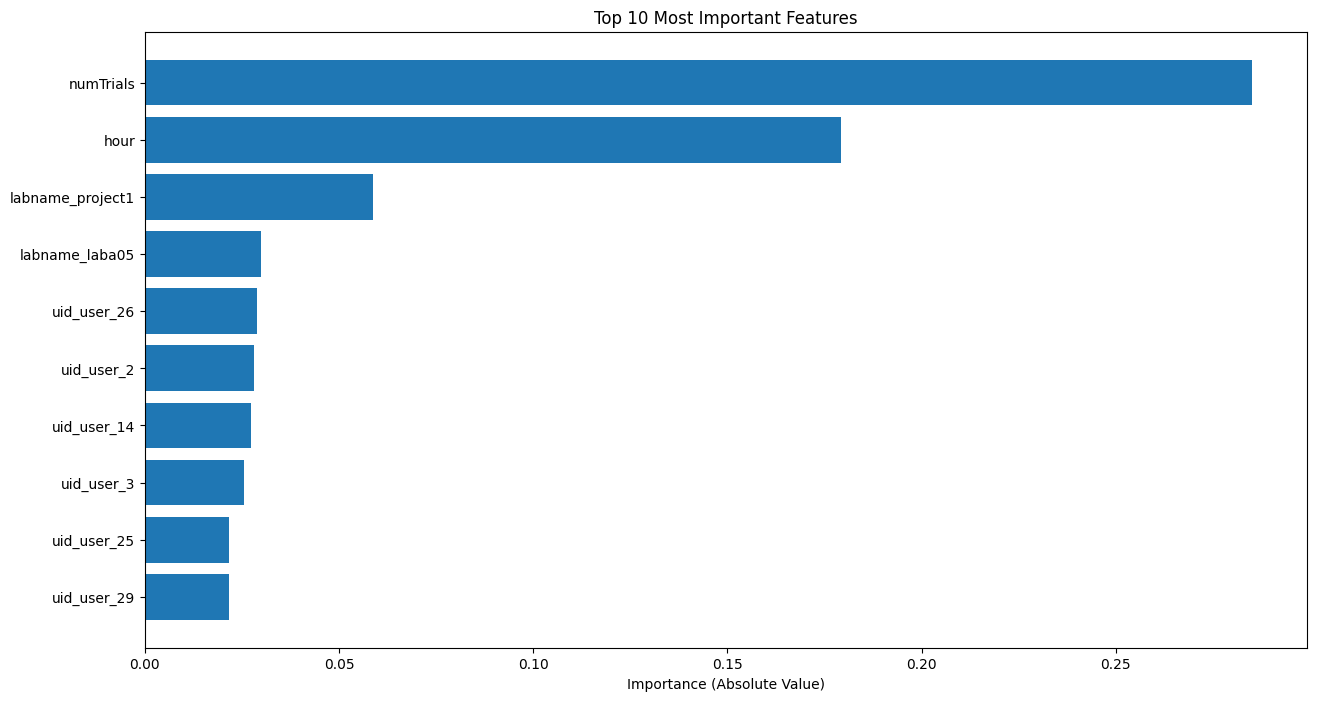

In [21]:
draw_plot(model_forest.feature_importances_, X.columns)